# Imports

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:90%!important;width:auto!important;}</style>"))

%reload_ext autoreload
%autoreload 2
%matplotlib inline

##Preprocessing

In [2]:
'''import concurrent
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed
from sys import platform as _platform
from functools import partial'''

'import concurrent\nfrom concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed\nfrom sys import platform as _platform\nfrom functools import partial'

# Resize and rotate images if necessary

**********   Training Data
Starting to process Training Data



GoodIds: 88
BadIds:  80
A variable called training_data has been generated and a file called training_data.npy has been saved
[array([[0.77254902, 0.79607843, 0.74509804, ..., 0.76078431, 0.75294118,
        0.77254902],
       [0.78039216, 0.78431373, 0.79215686, ..., 0.76470588, 0.77647059,
        0.77647059],
       [0.76078431, 0.79215686, 0.77254902, ..., 0.78431373, 0.74901961,
        0.78039216],
       ...,
       [0.7254902 , 0.7254902 , 0.7254902 , ..., 0.74509804, 0.73333333,
        0.74509804],
       [0.74117647, 0.75294118, 0.74509804, ..., 0.7372549 , 0.72941176,
        0.72941176],
       [0.70980392, 0.72156863, 0.73333333, ..., 0.71764706, 0.74117647,
        0.76862745]]), array([0., 1.])]

**********   Test Data
Starting to process Test Data



GoodIds: 20
BadIds:  20
A variable called test_data has been generated and a file called test_data.npy has been saved
[array([[0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       ...,
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843]]), array([1., 0.])]

Data prepared
[array([[0.96862745, 0.97254902, 0.98039216, ..., 1.        , 1.        ,
        1.        ],
       [0.96470588, 0.97647059, 0.92156863, ..., 0.99215686, 1.        ,
        1.        ],
       [0.95294118, 0.93333333, 0.94117647, ..., 0.99215686, 1.        ,
        

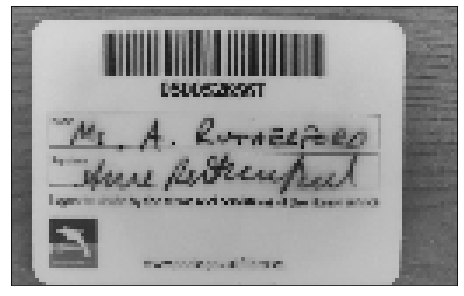

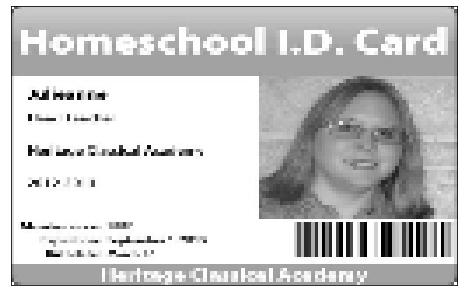

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from tqdm.notebook import trange, tqdm
from tempfile import TemporaryDirectory
from pathlib import Path
import pdb
import cv2
import requests
import mimetypes
import json

import os
from os import listdir
from matplotlib import image


def show_img(im, ax=None, figsize=(8,8), title=None):
    if not ax: _,ax = plt.subplots(1,1,figsize=figsize)
    if len(im.shape)==2: im = np.tile(im[:,:,None], 3) 
    ax.imshow(im);
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    if title: ax.set_title(title)
    return ax
#End of show_img

def rotate_bound(image, angle):
    # Rotate images
    # Example from PYImageSearch, by Adrian Rosebrock
    # grab the dimensions of the image then determine the center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    # grab rotation matrix (applying the negative of the angle to rotate clockwise), 
    # then grab sine and cosine (i.e. rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    # compute new bounding dimensions of image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust rotation matrix to take translation into account 
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    # perform rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))
#End of rotate_bound
    

class CardTrainData():
    

    GOOD = "Id\\"
    BAD =   "Notid\\"
    LABELS = {GOOD: 1, BAD: 0}
    training_data = []
    TrainingGoodIdcount = 0
    TrainingBadIdcount = 0
    
    def make_training_data(self):
        print('Starting to process Training Data')
        for label in self.LABELS:
                    
            folder = (Jobpath+label)           
            for f in tqdm(os.listdir(folder)):  
                if 'jpeg'or 'jpg' in f:      
                    try:
                        path = os.path.join(folder, f)
                        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        # print('Source image location is:  ',path)  #for checking - comment out or remove
                        
                        (h, w) = img_data.shape[:2]
                        if h > w:
                           img_data = rotate_bound(img_data, -90) 
                        
                        img_data = cv2.resize(img_data, Size ) #was self.Size
                        #img_data = img_data[:, :, [2, 1, 0]] #needed to correct colour change if in RGB
                        
                        self.training_data.append([(np.array(img_data))/255, np.eye(2)[self.LABELS[label]]])  
                        #print('Label is :-  ',np.eye(2)[self.LABELS[label]], self.LABELS[label]) #for checking - comment out or remove
                        
                        if [self.LABELS[label]] == [1]:
                            self.TrainingGoodIdcount += 1
                        elif [self.LABELS[label]] == [0]:
                            self.TrainingBadIdcount += 1
                    except Exception as e:
                        pass
        show_img(img_data,figsize=(8,8)) # Just as a check when testing program
        np.random.shuffle(self.training_data)  
        ##self.training_data = []
        np.save("training_data.npy", self.training_data)
       
# End of class CardTrainData()


class CardTestData():
    
    GOOD = "Idtest\\"
    BAD = "Notidtest\\"
    LABELS = {GOOD: 1, BAD: 0}
    test_data = []
    TestGoodIdcount = 0
    TestBadIdcount = 0
    
    def make_test_data(self):
        print('Starting to process Test Data')
        for label in self.LABELS:
                    
            folder = (Jobpath+label)           
            for f in tqdm(os.listdir(folder)):  
                if "jpeg" or "jpg" in f:      
                    try:
                        path = os.path.join(folder, f)
                        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        # print('Source image location is:  ',path)  #for checking - comment out or remove
                        
                        (h, w) = img_data.shape[:2]
                        if h > w:
                           img_data = rotate_bound(img_data, -90) 
                        
                        img_data = cv2.resize(img_data, Size )
                        #img_data = img_data[:, :, [2, 1, 0]] #needed to correct colour change if in RGB
                        
                        self.test_data.append([(np.array(img_data))/255, np.eye(2)[self.LABELS[label]]])  
                       #print('Label is :-  ',np.eye(2)[self.LABELS[label]], self.LABELS[label]) #for checking - comment out or remove
                        
                        if [self.LABELS[label]] == [1]:
                            self.TestGoodIdcount += 1
                        elif [self.LABELS[label]] == [0]:
                            self.TestBadIdcount += 1
                    except Exception as e:
                        pass
                    
        show_img(img_data,figsize=(8,8)) # Just as a check when testing programs            
        #show_img(self.test_data[0],figsize=(8,8)) # Just as a check when testing programs
        np.random.shuffle(self.test_data)        
        np.save("test_data.npy", self.test_data)
       
# End of class CardTestData()

#Jobpath = "C:\\Users\\user\\Documents\\Python Scripts\\"
Jobpath = "C:\\Users\\aer8\\Downloads\\L7cv\\"


DoTrainingDataOnly = True # Set to False for Test Data only

Size =   128, 80     #256,160  #  512, 320 

if DoTrainingDataOnly:
    print('**********   Training Data')
   
    
    datatestproc = CardTrainData()
    datatestproc.make_training_data()

    print('GoodIds:',datatestproc.TrainingGoodIdcount)  #for checking - comment out or remove
    print('BadIds: ',datatestproc.TrainingBadIdcount)   #for checking - comment out or remove    
    print('A variable called training_data has been generated and a file called training_data.npy has been saved')   
        
    #print(CardData.Count )

    print(CardTrainData.training_data[1]) # prints first image data and its label
    #show_img(CardTrainData.training_data[1], figsize=(8,8)) 
    print()

#else:

    print('**********   Test Data'    )

    datatestproc = CardTestData()
    datatestproc.make_test_data()

    print('GoodIds:',datatestproc.TestGoodIdcount)  #for checking - comment out or remove
    print('BadIds: ',datatestproc.TestBadIdcount)   #for checking - comment out or remove    
    print('A variable called test_data has been generated and a file called test_data.npy has been saved')

    print(CardTestData.test_data[1]) # prints first image data and its label
    #show_img(CardTrainData.training_data[1], figsize=(8,8)) 
    print()
 
print('Data prepared')

xtraindata = np.load("training_data.npy", allow_pickle=True)
xtestdata = np.load("test_data.npy",allow_pickle=True )

print(xtraindata[5]) # prints one example of image data and its label
print(xtestdata[5]) # prints one example of image data and its label


In [4]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


class Net(nn.Module):
    def __init__(self):
        super().__init__() # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 3) # input is 1 image, 32 output channels, 5x5 kernel / window
        self.conv2 = nn.Conv2d(32, 64, 3) # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 kernel / window
        self.conv3 = nn.Conv2d(64, 128, 3)

        x = torch.randn(128,80).view(-1,1,128,80)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 128) #flattening.
        self.fc2 = nn.Linear(128, 2) #   ????64 ??  512 in, 2 out bc we're doing 2 classes (id or not).

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # .view is reshape ... this flattens X before 
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.softmax(x, dim=1)


net = Net()
print ('hello')
device = torch.device ("cpu") # PyTorch v0.4.0
model = Net().to(device)
summary(model, (1, 128, 80))
print(net)
print('hy')

hello
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 32, 126, 78]             320
            Conv2d-2           [-1, 64, 61, 37]          18,496
            Conv2d-3          [-1, 128, 28, 16]          73,856
            Linear-4                  [-1, 128]       1,835,136
            Linear-5                    [-1, 2]             258
Total params: 1,928,066
Trainable params: 1,928,066
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.04
Forward/backward pass size (MB): 3.94
Params size (MB): 7.35
Estimated Total Size (MB): 11.33
----------------------------------------------------------------
Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=14336, 

# Training Loop

In [5]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
#loss_function = nn.MSELoss()
loss_function = nn.SmoothL1Loss()

In [6]:
xtraindata = np.load("training_data.npy", allow_pickle=True)

train_X = torch.Tensor([i[0] for i in xtraindata]).view(-1,128,80)

train_y = torch.Tensor([i[1] for i in xtraindata])


In [7]:
#train_X = X
#train_y = y

#VAL_PCT = 0.5  # lets do 50% to save time during program testing
#val_size = int(len(X)*VAL_PCT)
#val_size = len(X)
#print(val_size)

#train_X = X[:-val_size]
#train_y = y[:-val_size]

print(len(train_X))

#test_X = X[-val_size:]
#test_y = y[-val_size:]
#print(len(train_X), len(test_X))


168


In [8]:
BATCH_SIZE = 10 #reduce from 100 to 10 for testing
EPOCHS = 10

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        #print(f"{i}:{i+BATCH_SIZE}")
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 128, 80)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. loss: {loss}")


Epoch: 0. loss: 0.12079450488090515



Epoch: 1. loss: 0.0969277173280716



Epoch: 2. loss: 0.03017624095082283



Epoch: 3. loss: 0.020385686308145523



Epoch: 4. loss: 0.00839302409440279



Epoch: 5. loss: 0.010681260377168655



Epoch: 6. loss: 0.012575617991387844



Epoch: 7. loss: 0.011309823952615261



Epoch: 8. loss: 0.008444656617939472



Epoch: 9. loss: 0.028405090793967247


# Testing Loop


In [11]:
def one_epoch(net, loss, dl, opt=None, metric=None):
    
    if opt:
        net.train()  # only affects some layers
    else:
        net.eval()
        rq_stored = []
        for p in net.parameters():
            rq_stored.append(p.requires_grad)
            p.requires_grad = False
    
    L, M = [], []
    dl_it = iter(dl)
    for xb, yb in tqdm(dl_it, leave=False):
        xb, yb = xb, yb
        y_ = net(xb)
        l = loss(y_, yb)
        if opt:
            opt.zero_grad()
            l.backward()
            opt.step()
        L.append(l.detach().cpu().numpy())
        if metric: M.append(metric(y_, yb).cpu().numpy())
        
    if not opt:
        for p,rq in zip(net.parameters(), rq_stored): p.requires_grad = rq
            
    return L, M    

In [15]:

xtestdata = np.load("test_data.npy",allow_pickle=True )

test_X = torch.Tensor([i[0] for i in xtestdata]).view(-1,128,80)

test_y = torch.Tensor([i[1] for i in xtestdata])


TP = 0 #True positive count 
FP = 0 #False positive count
FN = 0 #False negative count
TN = 0 #True negative count

correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 128, 80))[0]  # returns a list, 
        predicted_class = torch.argmax(net_out)

        if predicted_class == real_class:
            correct += 1          
        total += 1
        
        if predicted_class == real_class:
            if real_class == 1:
                TP += 1
            else:
                TN += 1
        else:           
            if real_class == 1:
                FN += 1
            else:
                FP += 1
         

print('Accuracy: %.3f' % (round(correct/total, 3)))       
#print("Accuracy: ", round(correct/total, 3))
print()
print('Extra for Confusion Matrix')
print('Sensitivity: %.3f' % (round(TP/(TP+FN), 3)))   
print('Precision: %.3f' % (round(TP/(TP+FP), 3)))   
print('Accuracy: %.3f' % (round((TP + TN)/(TP+TN+FP+FN), 3)))  
print()


Accuracy: 0.825

Extra for Confusion Matrix
Sensitivity: 0.800
Precision: 0.842
Accuracy: 0.825



In [13]:
accuracy = lambda y_,yb: (y_.max(dim=1)[1] == yb).float().mean()

In [ ]:
def fit(net, tr_dl, val_dl, loss=nn.CrossEntropyLoss(), epochs=3, lr=3e-3, wd=1e-3, plot=True):   
    
    opt = optim.Adam(net.parameters(), lr=lr, weight_decay=wd)
    
    Ltr_hist, Lval_hist = [], []
    for epoch in trange(epochs):
        Ltr,  _    = one_epoch(net, loss, tr_dl,  opt)
        Lval, Aval = one_epoch(net, loss, val_dl, None, accuracy)
        Ltr_hist.append(np.mean(Ltr))
        Lval_hist.append(np.mean(Lval))
        print(f'epoch: {epoch}\ttraining loss: {np.mean(Ltr):0.4f}\tvalidation loss: {np.mean(Lval):0.4f}\tvalidation accuracy: {np.mean(Aval):0.2f}')
        
    # plot the losses     
    if plot:
        _,ax = plt.subplots(1,1,figsize=(16,4))
        ax.plot(1+np.arange(len(Ltr_hist)),Ltr_hist)
        ax.plot(1+np.arange(len(Lval_hist)),Lval_hist)
        ax.grid('on')
        ax.set_xlim(left=1, right=len(Ltr_hist))
        ax.legend(['training loss', 'validation loss']);
        
    return Ltr_hist, Lval_hist

# STL10 Dataset (copied from previous notebook)